<a href="https://colab.research.google.com/github/wing787/books_Python_for_Geospatial_Data_Analysis/blob/main/ch_8/ch8_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ランタイム切断後に再度実行
# !pip install geopandas

In [2]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

INPUT_FILE = '/content/drive/MyDrive/Colab Notebooks/Pythonによる地理空間データ分析_例題で学ぶロケーションインテリジェンス/NYPD_Complaint_Data_Historic_2020.csv'
df = pd.read_csv(INPUT_FILE)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,260638317,01/21/2020,00:00:00,09/15/2020,00:00:00,1,12/29/2022,112,THEFT-FRAUD,739.0,...,PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E,10365.0,56,4,32,1
1,260547755,04/16/2020,13:00:00,12/21/2022,13:00:00,46,12/27/2022,109,GRAND LARCENY,425.0,...,PATROL BORO BRONX,(null),65+,WHITE HISPANIC,F,10931.0,6,5,29,29
2,260515181,12/26/2020,17:55:00,12/26/2022,18:15:00,46,12/26/2022,232,POSSESSION OF STOLEN PROPERTY,490.0,...,PATROL BORO BRONX,(null),65+,BLACK,M,10931.0,6,5,29,29
3,260537980,01/01/2020,08:00:00,12/25/2022,14:00:00,104,12/25/2022,361,OFF. AGNST PUB ORD SENSBLTY &,662.0,...,PATROL BORO QUEENS NORTH,(null),18-24,WHITE,F,14788.0,54,3,34,62
4,260468449,02/15/2020,00:09:00,02/15/2020,00:23:00,78,12/24/2022,355,OFFENSES AGAINST THE PERSON,115.0,...,PATROL BORO BKLYN SOUTH,(null),UNKNOWN,UNKNOWN,M,17619.0,14,2,38,50


In [4]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


street_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Pythonによる地理空間データ分析_例題で学ぶロケーションインテリジェンス/Borough Boundaries/geo_export_732d5468-922b-40c2-aab5-555278672be0.shp')

In [5]:
# 座標系を指定
crs = {'init': 'epsg:4326'}
# x, y座標を辞書化し、地物として定義
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# GeoPandasデータフレームを作成
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,geometry
0,260638317,01/21/2020,00:00:00,09/15/2020,00:00:00,1,12/29/2022,112,THEFT-FRAUD,739.0,...,(null),UNKNOWN,UNKNOWN,E,10365.0,56,4,32,1,POINT (-74.00476 40.71602)
1,260547755,04/16/2020,13:00:00,12/21/2022,13:00:00,46,12/27/2022,109,GRAND LARCENY,425.0,...,(null),65+,WHITE HISPANIC,F,10931.0,6,5,29,29,POINT (-73.90871 40.84764)
2,260515181,12/26/2020,17:55:00,12/26/2022,18:15:00,46,12/26/2022,232,POSSESSION OF STOLEN PROPERTY,490.0,...,(null),65+,BLACK,M,10931.0,6,5,29,29,POINT (-73.92246 40.84519)
3,260537980,01/01/2020,08:00:00,12/25/2022,14:00:00,104,12/25/2022,361,OFF. AGNST PUB ORD SENSBLTY &,662.0,...,(null),18-24,WHITE,F,14788.0,54,3,34,62,POINT (-73.90810 40.72396)
4,260468449,02/15/2020,00:09:00,02/15/2020,00:23:00,78,12/24/2022,355,OFFENSES AGAINST THE PERSON,115.0,...,(null),UNKNOWN,UNKNOWN,M,17619.0,14,2,38,50,POINT (-73.98306 40.68183)


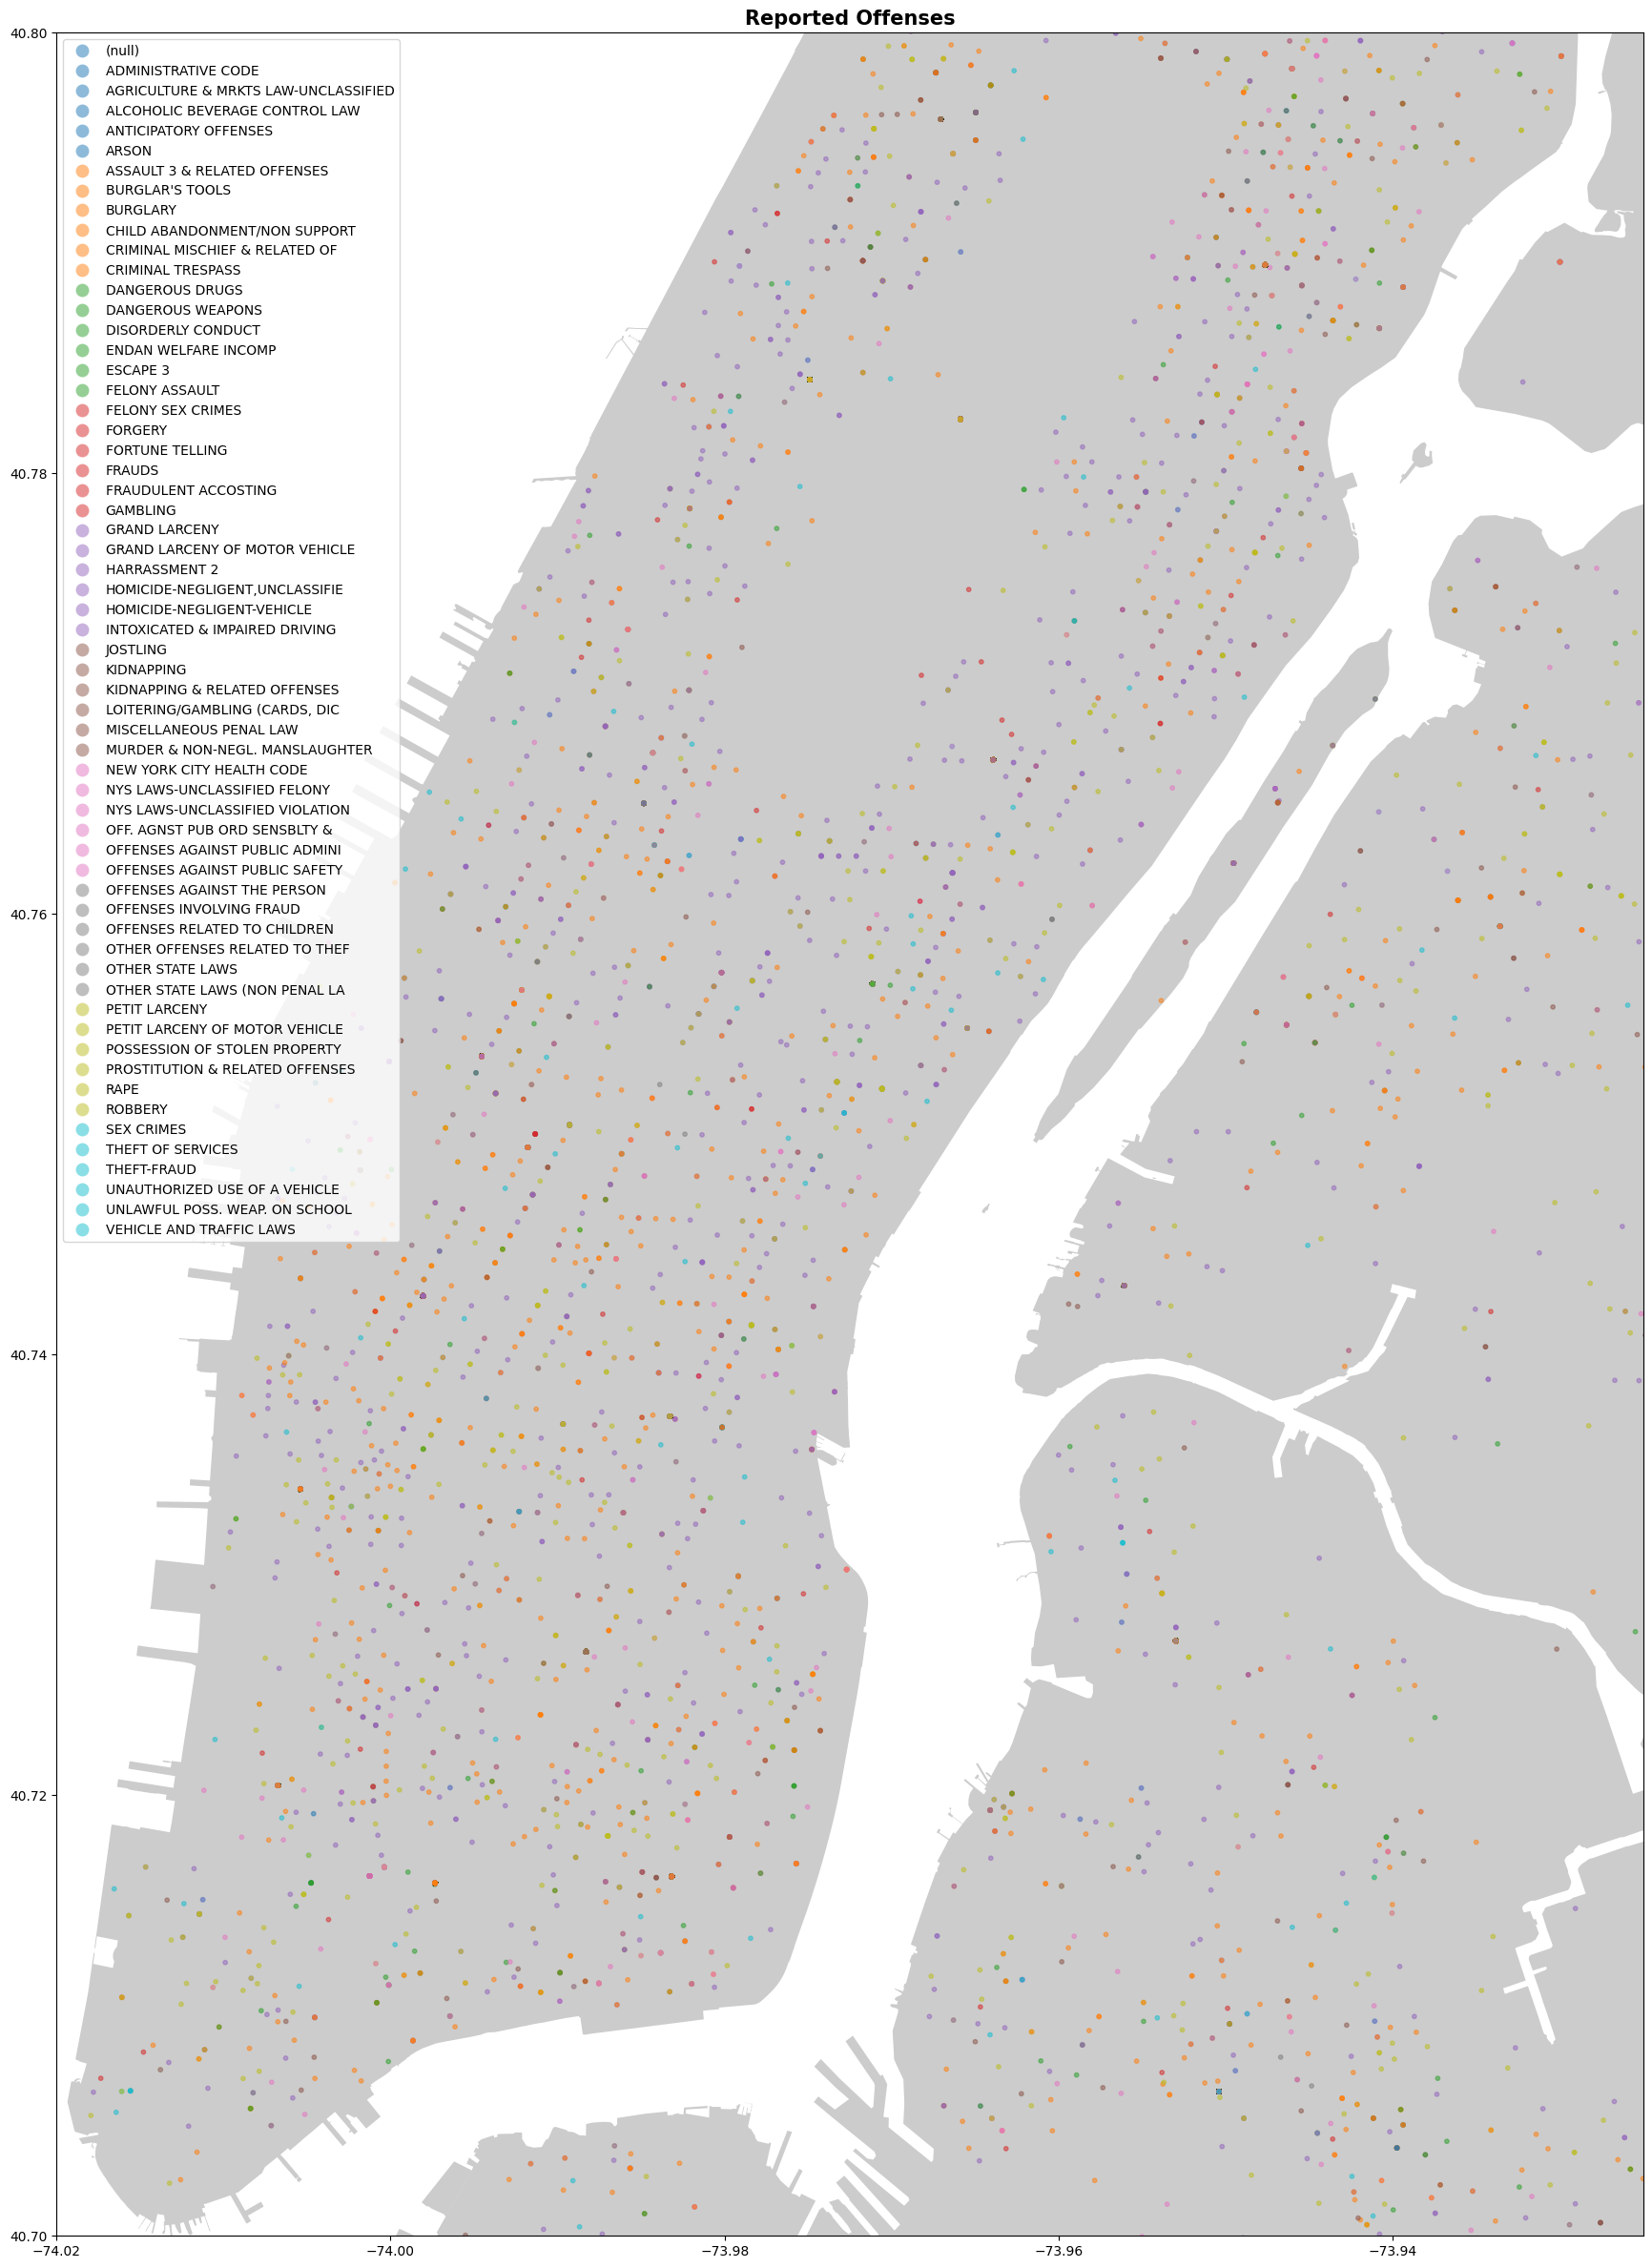

In [6]:
# 図と座標軸を作成し、subplots（matplotlib）に代入
fig, ax = plt.subplots(figsize=(30, 30))
# add .shp file
street_map.plot(ax=ax, alpha=0.4, color='grey')
# add geodataframe
# 'OFNS_DESC'変数をグラフ座標を代入
# add legend
# データポイントの透過率をalphaにより指定
# 点の大きさをmarkersizeにより指定
geo_df.plot(column='OFNS_DESC', ax=ax, alpha=.5, legend=True, markersize=10)
# Add Title to glaph
plt.title('Reported Offenses', fontsize=15, fontweight='bold')
# 地図表示用の緯度・経度境界を設定
plt.xlim(-74.02, -73.925)
plt.ylim(40.7, 40.8)
# show map
plt.show();